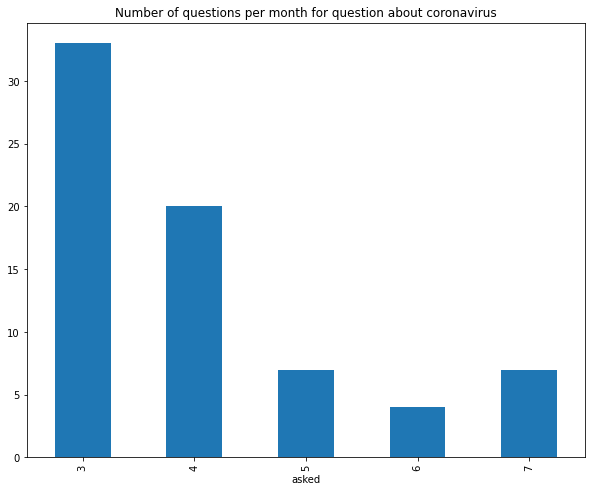

In [2]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/covid.json')
df['asked'] = pd.to_datetime(df['asked'],utc= True)
import matplotlib.pyplot as plt
trend_of_questions = df['title'].groupby([df.asked.dt.month]).agg('count')
trend_of_questions.plot(x='asked', y='answer_count', kind ='bar', figsize=(10,8))
plt.title('Number of questions per month for question about coronavirus')
plt.savefig('./figures/_corona_number_of_question_per_month.png', bbox_inches='tight')
plt.show()



In [3]:
describe_month_df = df.groupby([df.asked.dt.month.rename('month')]).describe()

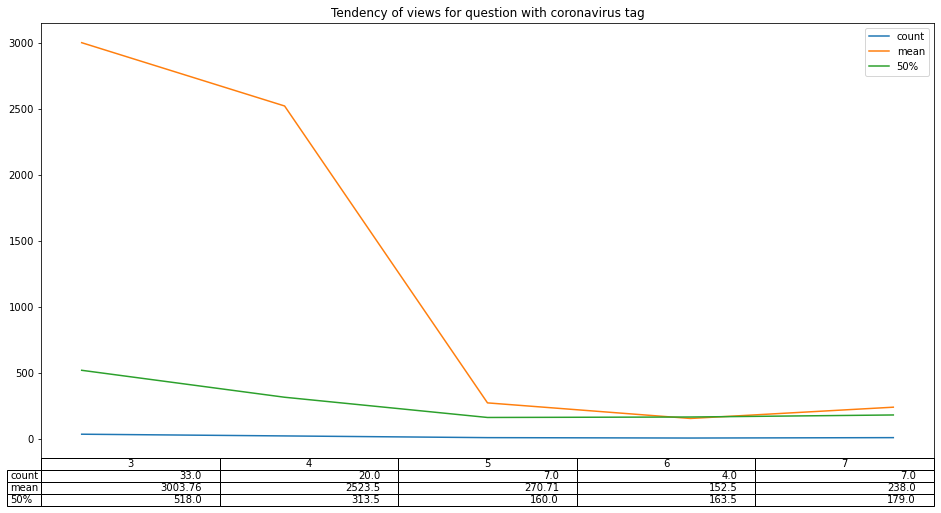

In [6]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
d = describe_month_df['views'][['count','mean','50%']]
x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot(ax=ax, title='Tendency of views for question with coronavirus tag', table = np.round(d.T,2))
plt.savefig('./figures/tendency_of_views_coronavirus.png', bbox_inches = 'tight')

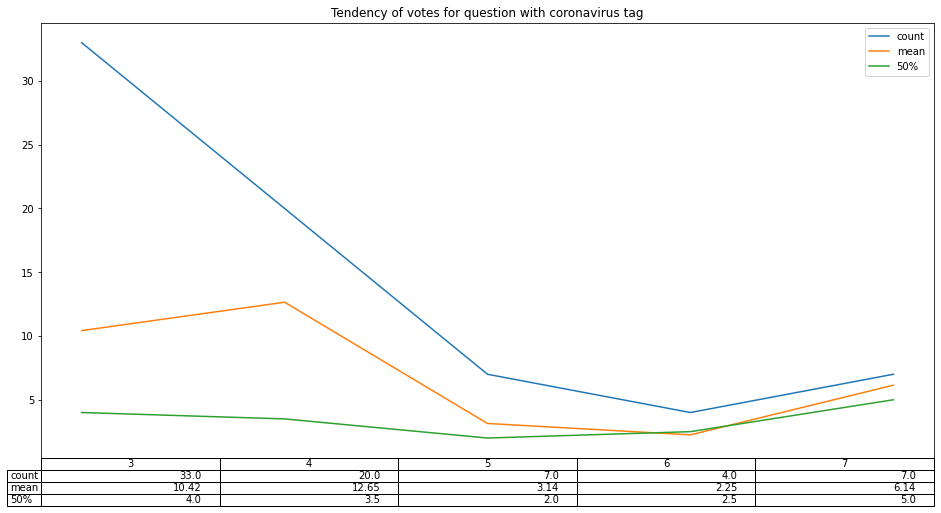

In [7]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
d = describe_month_df['votes'][['count','mean','50%']]
x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot(ax=ax, title='Tendency of votes for question with coronavirus tag', table = np.round(d.T,2))
plt.savefig('./figures/tendency_of_votes_coronavirus.png', bbox_inches = 'tight')

In [8]:
import collections
top = 20
all_tags = []
for a in df['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f

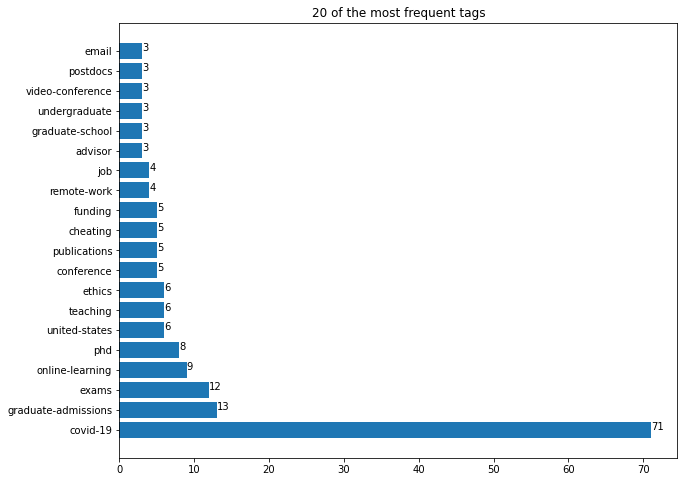

In [9]:
n = 20
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tags_for_coronavirus',bbox_inches='tight')

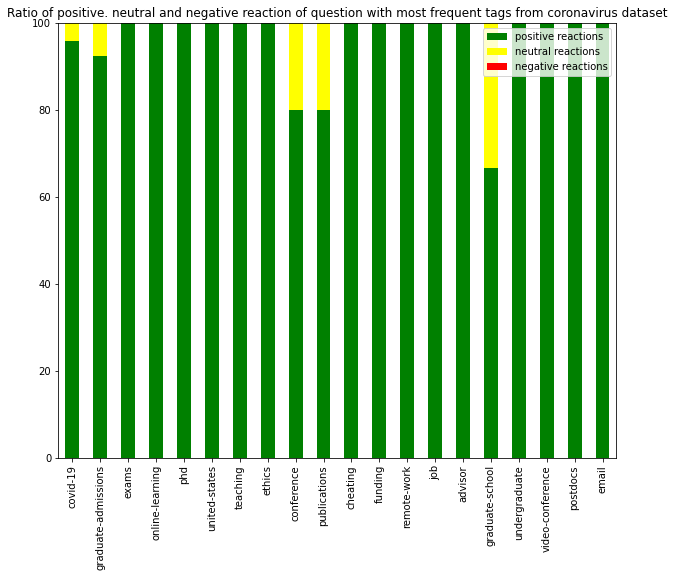

In [15]:
import json
all_tags = []
for a in df.loc[df['votes']> 0]['tags']:
    all_tags += a
cnt_positive = collections.Counter(all_tags)
cnt_positive.most_common(10)
positive_dict = {}
for w,f in cnt_positive.most_common():
    positive_dict[w] = f



all_tags = []
for a in df.loc[df['votes']< 0]['tags']:
    all_tags += a  
cnt_negative = collections.Counter(all_tags)

negative_dict = {}
for w,f in cnt_negative.most_common():
    negative_dict[w] = f

result = {}
for k, v in commont_dict.items():
    neg_rate = 0
    pos_rate = 0
    if k in negative_dict.keys():
        neg_rate = (negative_dict[k] / v)*100
    if k in positive_dict.keys():
        pos_rate = (positive_dict[k] / v) *100
    neut_rate = 100 - neg_rate - pos_rate
    result[k] = {
        'positive reactions' : round(pos_rate,2),
        'neutral reactions' :round(neut_rate,2),
        'negative reactions': round(neg_rate,2)
    }
    
n_most_frequent_tags = data.index

result_for_n = { your_key: result[your_key] for your_key in n_most_frequent_tags }
result_for_n = pd.DataFrame.from_dict(result_for_n, orient='index')
result_for_n['idx'] = result_for_n.index
ax = result_for_n['positive reactions'].plot( kind="bar", color='green', figsize=(10,8), title='Ratio of positive. neutral and negative reaction of question with most frequent tags from coronavirus dataset',
                                            legend= True)
result_for_n['neutral reactions'].plot(kind='bar', color='yellow',bottom=result_for_n['positive reactions'],legend= True)
result_for_n['negative reactions'].plot(kind='bar', color='red', bottom=result_for_n['neutral reactions']+result_for_n['positive reactions'],
                                       legend= True)

plt.savefig('./figures/ratio_ofreaction_on question_coronavirus.png', bbox_inches = 'tight')

In [13]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

most_popular = pd. DataFrame()
for t in n_most_frequent_tags.to_list():
    mean_views = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['views'].mean()
    mean_answers_count =  df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['answers_count'].mean()
    mean_votes = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['votes'].mean()
    most_popular = most_popular.append(pd.Series({'mean_views': mean_views, 'mean_answer_count' : mean_answers_count, 'mean_votes' : mean_votes},name = t))

most_popular = most_popular.sort_values(by = 'mean_answer_count', ascending= False)
most_popular.style.apply(highlight_max)

,mean_answer_count,mean_views,mean_votes
cheating,5.800000,12882.800000,32.200000
ethics,5.166667,5267.333333,27.333333
conference,4.000000,4876.800000,25.600000
exams,3.833333,6523.166667,19.500000
video-conference,3.666667,5050.333333,24.666667
email,3.000000,3219.333333,11.666667
publications,2.800000,1054.600000,7.200000
advisor,2.666667,4187.333333,14.666667
postdocs,2.666667,2397.666667,13.000000
graduate-school,2.333333,3085.000000,11.000000
